## 1 Задание

p0 = 3e-15, alpha1 = 167.55
p0 = 3e-14, alpha2 = 85.14
p0 = 7e-14, alpha3 = 42.92
p0 = 1.1e-13, alpha4 = 27.93
p0 = 7e-13, alpha5 = 3.78


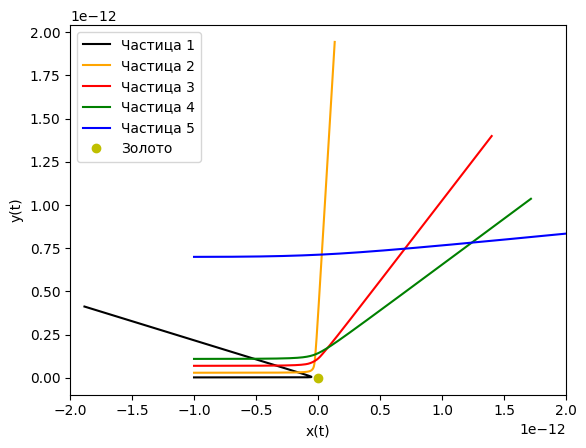

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

q = 3.2e-19
m = 1.39e-27
W = 6.4087e-13

q_gold = 1.26e-17
T = 1e-19
L = 1e-12
eps0 = 8.85e-12
# p0 = [1e-15, 5e-15, 30e-15, 60e-15, 100e-15]
p0 = [3e-15, 30e-15, 70e-15, 110e-15, 700e-15]
def r12(t, y):
    return np.sqrt(y[0]**2 + y[1]**2)

def F(t, y):
    r = r12(t, y)
    return 1/4 * q * q_gold / (np.pi * eps0 * r**2)

def sys(t, y):
    return [y[2], y[3], F(t, y) * y[0] / r12(t, y) / m, F(t, y) * y[1] / r12(t, y) / m]

colors = ['black', 'orange', 'red', 'green', 'blue']
ph = []

for p in p0:
    sol = solve_ivp(sys, [0, T], [-L, p, np.sqrt(2*W/m), 0], method='DOP853', dense_output=True,t_eval=np.linspace(0, T, num=100000))
    angle = np.arctan2(sol.y[1, -1] - sol.y[1, sol.t.size // 2], sol.y[0, -1] - sol.y[0, sol.t.size // 2]) * 180 / np.pi
    # angle = np.arctan2(sol.y[1, -1] - p, sol.y[0, -1]) * 180 / np.pi
    if angle < 0:
        angle += 180
    ph.append(angle)
    plt.plot(sol.y[0], sol.y[1], color=colors.pop(0), label=f'Частица {len(p0)-len(colors)}')

for i, angle in enumerate(ph, 1):
    print(f'p0 = {p0[i-1]}, alpha{i} = {angle:.2f}')

plt.plot(0, 0, 'yo', label='Золото')
plt.legend()
plt.xlim(-2e-12, 2e-12)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()

## 2 Задание

p0 = 3e-15, alpha1 = 7.52
p0 = 3e-14, alpha2 = 44.96
p0 = 7e-14, alpha3 = 43.49
p0 = 1e-13, alpha4 = 31.04
p0 = 7e-13, alpha5 = 3.85


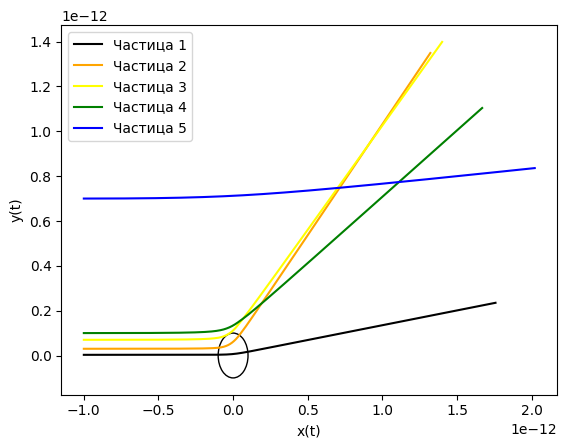

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib

q = 3.2e-19
m = 1.39e-27
W = 6.4087e-13

q_gold = 1.26e-17
T = 1e-19
L = 1e-12
eps0 = 8.85e-12
# p0 = [1e-15, 5e-15, 30e-15, 60e-15, 100e-15]
p0 = [3e-15, 30e-15, 70e-15, 100e-15, 700e-15]

R = 1e-13

def Ex(x, y):
    r = np.sqrt(y**2 + x**2)
    return np.where(r <= R, 1/4 * q_gold * x / (np.pi * eps0 * R**3), 1/4 * q_gold * x / (np.pi * eps0 * r**3))

def Ey(x, y):
    r = np.sqrt(y**2 + x**2)
    return np.where(r <= R, 1/4 * q_gold * y / (np.pi * eps0 * R**3), 1/4 * q_gold * y / (np.pi * eps0 * r**3))

def sys(t, y):
    return [y[2], y[3], q * Ex(y[0], y[1]) / m, q * Ey(y[0], y[1]) / m]

colors = ['black', 'orange', 'yellow', 'green', 'blue']
ph = []

for p in p0:
    sol = solve_ivp(sys, [0, T], [-L, p, np.sqrt(2*W/m), 0], method='DOP853', dense_output=True, t_eval=np.linspace(0, T, num=100000))
    # angle = np.arctan2(sol.y[1, -1] - sol.y[1, sol.t.size // 2], sol.y[0, -1] - sol.y[0, sol.t.size // 2]) * 180 / np.pi
    angle = np.arctan2(sol.y[1, -1] - p, sol.y[0, -1]) * 180 / np.pi
    if angle < 0:
        angle += 180
    ph.append(angle)
    plt.plot(sol.y[0], sol.y[1], color=colors.pop(0), label=f'Частица {len(p0)-len(colors)}')
    # plt.plot(sol.y[0], sol.y[1], label=f'Частица {len(p0)-len(colors)}')


for i, angle in enumerate(ph, 1):
    print(f'p0 = {p0[i-1]}, alpha{i} = {angle:.2f}')

circle1 = matplotlib.patches.Circle((0, 0), radius=R, fill=False)
plt.gca().add_patch(circle1)

plt.legend()
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()

## 3 Задание

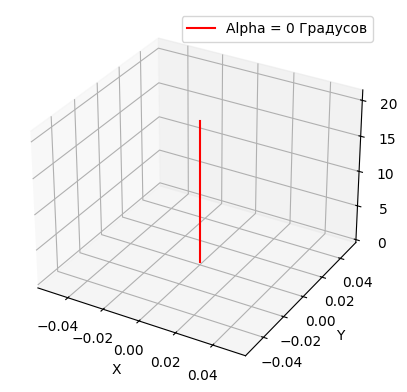

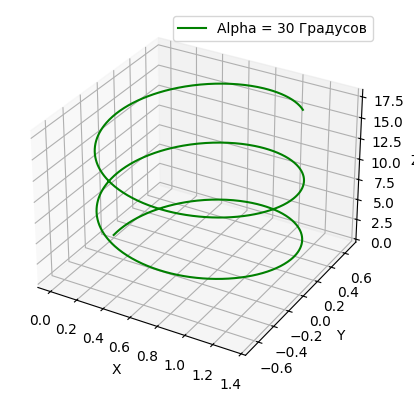

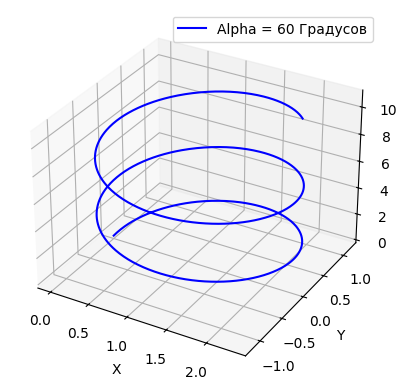

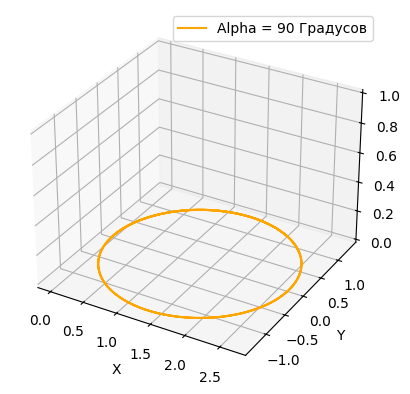

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = [0, np.pi/6, np.pi/3, np.pi/2]
B = 3
q = 2
m = 4
V0 = 2
colors = ['red', 'green', 'blue', 'orange']

def system(t, Y, p):
    vx, vy, vz, x, y, z = Y
    dvxdt = q * B * vy / m
    dvydt = -q * B * vx / m
    dvzdt = 0
    dxdt = vx
    dydt = vy
    dzdt = vz
    return [dvxdt, dvydt, dvzdt, dxdt, dydt, dzdt]

for i, angle in enumerate(alpha):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    sol = solve_ivp(system, [0, 10], [0, V0*np.sin(angle), V0*np.cos(angle), 0, 0, 0], args=(angle,), method='DOP853', dense_output=True, t_eval=np.linspace(0, 10, num=1000))
    t_vals = np.linspace(0, 10, 1000)
    sol_vals = sol.sol(t_vals)
    x_vals, y_vals, z_vals = sol_vals[3], sol_vals[4], sol_vals[5]
    ax.plot3D(x_vals, y_vals, z_vals, color=colors[i], label=f'Alpha = {np.rad2deg(angle):.0f} Градусов')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    
    ax.set_zlim(np.ceil(np.min(z_vals)), np.ceil(np.max(z_vals)))
    
    plt.show()


## 4 Задание

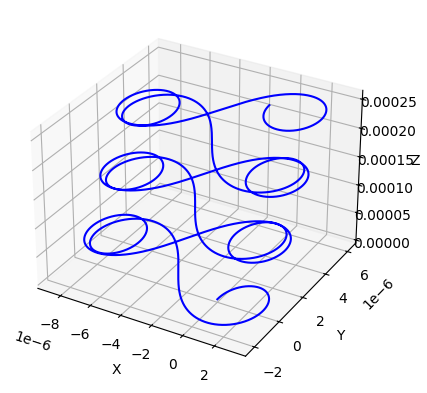

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = np.pi/6
B0 = 2
q = 1.6e-19
m = 9.1e-31
V0 = 1e6
T = 3e-10
nu = 1e10

def B(t):
    return B0 * np.cos(2 * np.pi * nu * t)

def sys(t, Y):
    vx, vy, vz, x, y, z = Y
    dvxdt = q * B(t) * vy / m
    dvydt = -q * B(t) * vx / m
    dvzdt = 0
    dxdt = vx
    dydt = vy
    dzdt = vz
    return [dvxdt, dvydt, dvzdt, dxdt, dydt, dzdt]

sol = solve_ivp(sys, [0, T], [0, V0 * np.sin(alpha), V0 * np.cos(alpha), 0, 0, 0], method='RK45', dense_output=True, t_eval=np.linspace(0, T, num=100000))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[3], sol.y[4], sol.y[5], color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()